In [174]:
//---- imports for HIPO4 library
import org.jlab.jnp.hipo4.io.*;
import org.jlab.jnp.hipo4.data.*;
//---- imports for GROOT library
import org.jlab.groot.data.*;
import org.jlab.groot.graphics.*;
//---- imports for PHYSICS library
import org.jlab.jnp.physics.*;
import org.jlab.jnp.reader.*;


HipoReader reader = new HipoReader(); // Create a reader obejct
//reader.open("/home/jnp/data/out_6489_2xx_3xx.hipo"); // open a file
reader.open("/Users/biselli/Data/clas12/out_6489_2xx_moremorebanks.hipo"); // open a file

reader:: *****>>>>> openning file : /Users/biselli/Data/clas12/out_6489_2xx_moremorebanks.hipo
reader:: ***** dictionary entries :            6
scanning trailer : # bytes = 8248
reader:: ***** number of  records :          257
reader:: ***** number of  events  :      1702511


In [175]:
public class DvcsEvent {
    LorentzVector  vBeam   = new LorentzVector(0.0,0.0,10.2,10.2);
    LorentzVector  vTarget = new LorentzVector(0.0,0.0,0.0,1.878);
    LorentzVector  velectron = new LorentzVector();
    LorentzVector  vphoton = new LorentzVector();
    LorentzVector  vhadron = new LorentzVector();
    double MNUC=1.878;
    
    public DvcsEvent() {
      // This constructor no parameter.
      System.out.println("setting the default DVCS event for hadron :" + MNUC );
   }
    public DvcsEvent(double mass) {
      // This constructor no parameter.
      MNUC=mass;
      System.out.println("setting the default DVCS event for hadron :" + MNUC );
   }

   public void setElectron(Bank particles, int ne) {
      velectron.setPxPyPzM(particles.getFloat("px",ne),
                                 particles.getFloat("py",ne),
                                 particles.getFloat("pz",ne),
                                 0.0005);
   }

   public void setPhoton(Bank particles, int ng) {
      vphoton.setPxPyPzM( particles.getFloat("px",ng),
                                particles.getFloat("py",ng),
                                particles.getFloat("pz",ng),
                                0.0);
   }
   public void setHadron(Bank particles, int nh) {
      vhadron.setPxPyPzM(particles.getFloat("px",nh),
                                particles.getFloat("py",nh),
                                particles.getFloat("pz",nh),
                                this.MNUC);
   }
   public LorentzVector W(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget).sub(velectron);
       return tmp;
       
   }
   public LorentzVector Q2(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.sub(velectron);
       return tmp;
       
   }
   public LorentzVector DVCSmissX(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget);
       tmp.sub(velectron);
       tmp.sub(vphoton);
       return tmp;
   
   }
   public LorentzVector ehehgX(){
       LorentzVector  tmp = new LorentzVector();
       tmp.copy(vBeam);
       tmp.add(vTarget);
       tmp.sub(velectron);
       tmp.sub(vphoton);
       tmp.sub(vhadron);
       return tmp;
   }
   public double MM2(){
       return this.DVCSmissX().mass2();
   }
   public double Mpx(){
       return this.DVCSmissX().px();
   }
   public double Mpy(){
       return this.DVCSmissX().py();
   }
   public double Mpz(){
       return this.DVCSmissX().pz();
   }
   public boolean DVCScut(){
       boolean cut=(-this.Q2().mass2()>1 && this.W().mass()>2 && this.vphoton.e()>1);
       return cut;
   }
   public double Xb(){
       return (-this.Q2().mass2())/(2*0.938*(this.vBeam.p()-this.velectron.p()));
   }
   
}

In [176]:
Event     event = new Event();
Bank  particles = new Bank(reader.getSchemaFactory().getSchema("REC::Particle"));
DvcsEvent ev = new DvcsEvent();

setting the default DVCS event for hadron :1.878


In [177]:
reader.getEvent(event,0); //Reads the first event and resets to the begining of the file
int times=0;
//LorentzVector  vBeam   = new LorentzVector(0.0,0.0,10.2,10.2);
//LorentzVector  vTarget = new LorentzVector(0.0,0.0,0.0,1.878);
//LorentzVector  velectron = new LorentzVector();
LorentzVector  vtmp = new LorentzVector();
//LorentzVector  vproton = new LorentzVector();
//LorentzVector  vphoton = new LorentzVector();
//LorentzVector  vdeuteron = new LorentzVector();
LorentzVector  vW = new LorentzVector();
LorentzVector  vQ2 = new LorentzVector();
LorentzVector  vMMass = new LorentzVector();
LorentzVector  vMMom = new LorentzVector();
Particle  proton = new Particle();
Particle neutron = new Particle();
Particle deuteron = new Particle();
Particle electron = new Particle();
Particle photon = new Particle();
double Xbj;
double el_en_max=0;
double ph_en_max=0;
double d_en_max=0;
int nelec=0;
int ndvcs=0;
int nphot=0;
int ndeut=0;
int ne=-1;
int ng=-1;
int nd=-1;
//double MNUC=1.878;
int PIDNUC=45;

In [178]:
// histos
H1F W = new H1F("W" ,100, 0, 10.0);
W.setTitleX("W [GeV]");
H1F Q2 = new H1F("Q2",100, 0.1, 4.0);
Q2.setTitleX("Q^2 [GeV/c^2]");
H1F MMass = new H1F("MMass",100,-30,30);
MMass.setTitleX("Missing Mass Squared");
H1F MMom = new H1F("MMass",100,-30,30);
MMom.setTitleX("Missing Momentum");
H1F MMomx = new H1F("MMass",100,-10,10);
MMomx.setTitleX("Missing X Momentum");
H1F MMomy = new H1F("MMass",100,-10,10);
MMomy.setTitleX("Missing Y Momentum");
H1F MMomz = new H1F("MMass",100,-10,15);
MMomz.setTitleX("Missing Z Momentum");
H2F WvsQ2 = new H2F("W vs Q2", "W vs Q2", 100,0,7,100,0,10);
WvsQ2.setTitleX("W [GeV]");
WvsQ2.setTitleY("Q^2 [GeV/c^2]");
H2F ThvsPhi = new H2F("Theta vs Phi","Theta vs Phi",100,-180,180,100,0,180);
ThvsPhi.setTitleX("Phi [Degrees]");
ThvsPhi.setTitleY("Theta [Degrees]");
H2F Q2vsXbj = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,0,10,100,0,1);
Q2vsXbj.setTitleX("Q^2 [GeV/c^2]");
Q2vsXbj.setTitleY("Xbj");
H2F MMvsMpz = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,-2,2,100,-10,10);
MMvsMpz.setTitleX("Missing Mass");  
MMvsMpz.setTitleY("Missing Z Momentum");
H2F MpxvsMpz = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,-2,2,100,-10,10);
MpxvsMpz.setTitleX("Missing X Momentum");
MpxvsMpz.setTitleY("Missing Z Momentum");


In [179]:
//with loops
while(reader.hasNext()==true){
    reader.nextEvent(event);
    event.read(particles);
    el_en_max=0;
    ph_en_max=0;
    d_en_max=0;
    nelec=0;
    ndeut=0;
    nphot=0;
    if(particles.getRows()>3){
        for(int npart=0; npart<particles.getRows(); npart++){
        int pid = particles.getInt("pid", npart);
        if(pid==11){ 
            nelec++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 0.0005);
            if(vtmp.e()>el_en_max)ne=npart;
        }
        else if(pid==22){
            nphot++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 0.0);
            if(vtmp.e()>ph_en_max)ng=npart;
            
        }
        else if(pid==PIDNUC){
            ndeut++;
            vtmp.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 ev.MNUC);
            if(vtmp.e()>d_en_max)nd=npart;
            
        }   
    }
    if(ndeut>=1 && nelec>=1 && nphot>=1){
        ev.setElectron(particles,ne);
        ev.setPhoton(particles,ng);
        ev.setHadron(particles,nd);
    
        vW.copy(ev.W());
        vQ2.copy(ev.Q2());
        
        
        //W.fill(vW.mass());
        
        if(ev.DVCScut()){
            ndvcs++;
            ThvsPhi.fill(ev.vhadron.phi()*180./Math.PI,ev.vhadron.theta()*180./Math.PI);
            Xbj=ev.Xb();
            Q2vsXbj.fill(-vQ2.mass2(),Xbj); 
            
            W.fill(vW.mass());
            Q2.fill(-vQ2.mass2());
            WvsQ2.fill(vW.mass(),-vQ2.mass2());
            
            MMass.fill(ev.MM2());
            
            //if(vMMass.mass2()>-1 && vMMass.mass2()<1 && (vphoton.theta()*180./Math.PI)<5){

        //    MMom.fill(vMMom.p());
            MMomx.fill(ev.Mpx());
            MMomy.fill(ev.Mpy());
            MMomz.fill(ev.Mpz());

        //    MMvsMpz.fill(vMMass.mass2(),vMMom.pz());
        //    MpxvsMpz.fill(vMMom.px(),vMMom.pz());
            //}
            }
        
        }
    }
}
    
System.out.println("total dvcs events: " + ndvcs);


total dvcs events: 3117


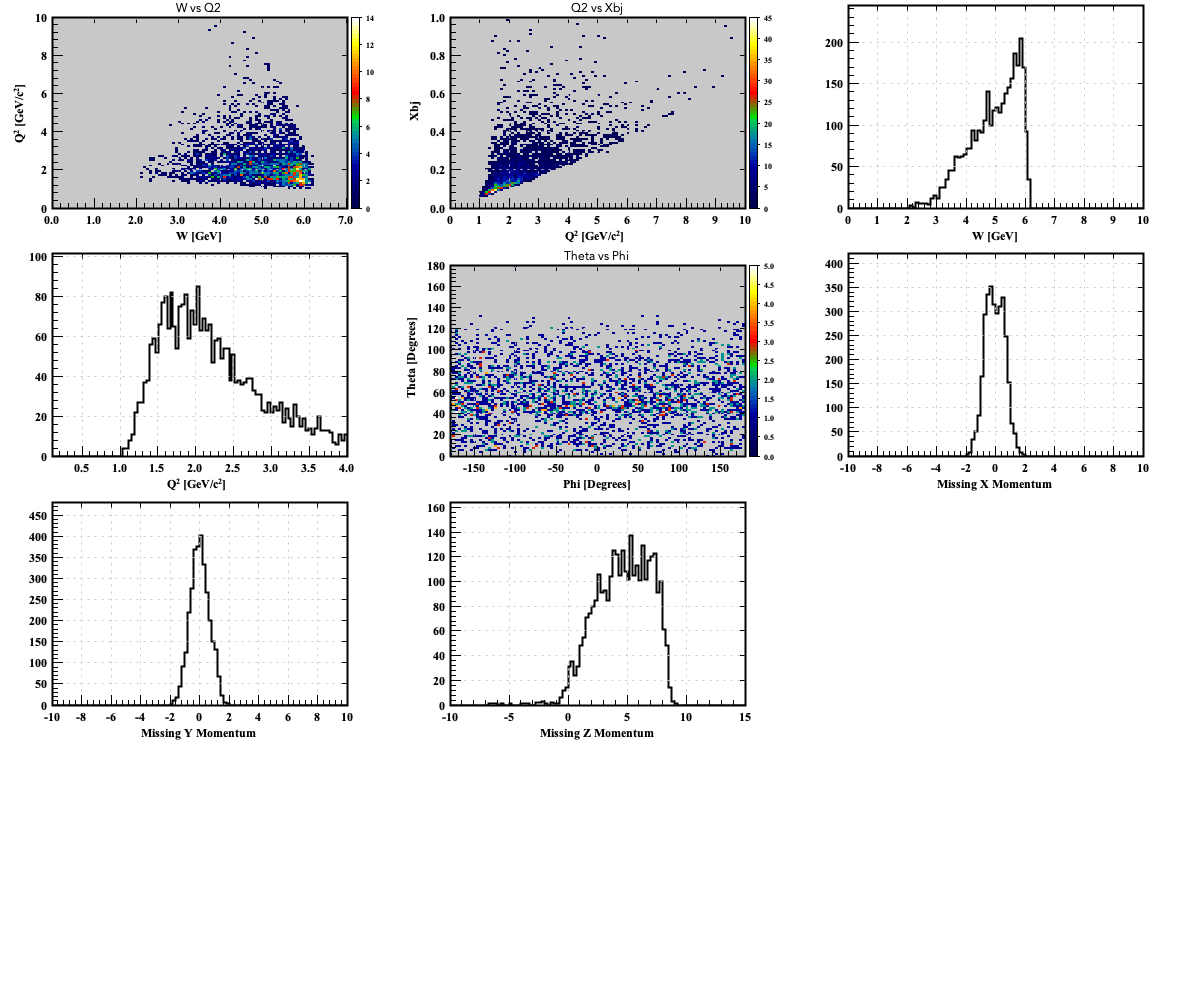

In [180]:

EmbeddedCanvas ec = new EmbeddedCanvas(1200,1000);
ec.divide(3,4);
//ec.getPad(0).getAxisZ().setLog(true);
ec.cd(0).draw(WvsQ2);
//ec.getPad(1).getAxisZ().setLog(true);
ec.cd(1).draw(Q2vsXbj);
ec.cd(2).draw(W);
ec.cd(3).draw(Q2);
ec.cd(4).draw(ThvsPhi);
ec.cd(5).draw(MMomx);
ec.cd(6).draw(MMomy);
ec.cd(7).draw(MMomz);
//ec.cd(0).draw(MMvsMpz);
//ec.cd(1).draw(MpxvsMpz);

ec.getScreenShot();


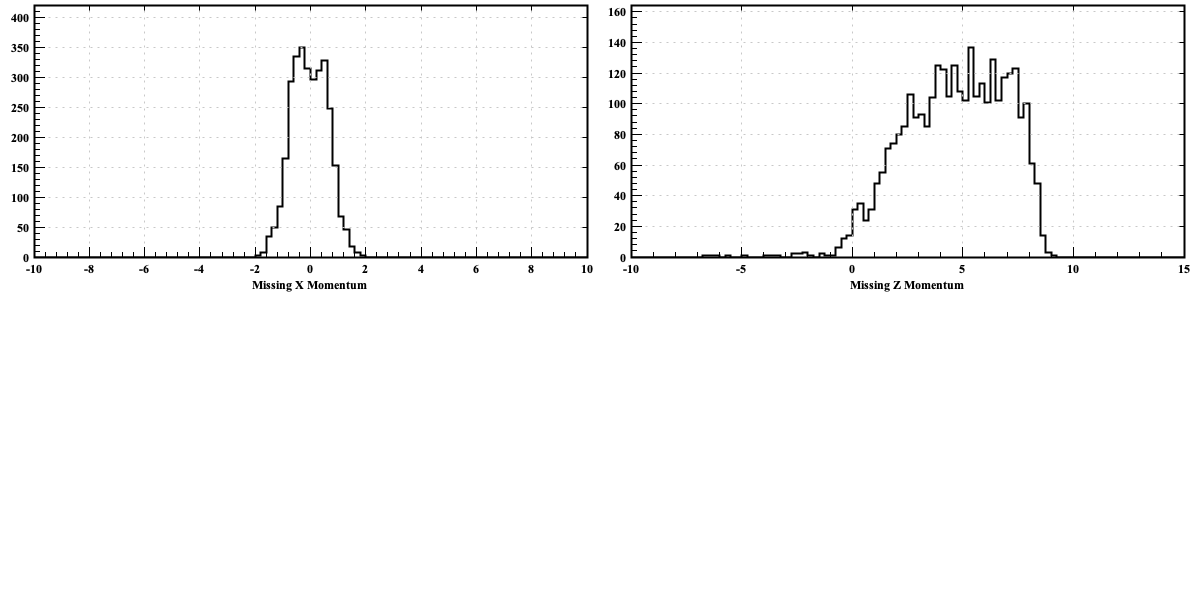

In [181]:
EmbeddedCanvas ec2 = new EmbeddedCanvas(1200,600);
ec2.divide(2,2);
ec2.cd(0).draw(MMomx);
ec2.cd(1).draw(MMomz);
ec2.getScreenShot();